In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from evalutation.plotting.plotting import PLOTTER
from data_prep.data_preparation import DATA_PREP
from data_loader.lfp_loader import LFP_LOADER

Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306


In [2]:
dp = DATA_PREP()

/home/rachel/Documents/lfp2spikes/modularized_code


In [56]:
b = 1
n_weights = 10
c = (n_weights,1)
splits = [1,2,3,4,5]
#n_weights += 1

#path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
#path_sklearn = "../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2]_channels_5-40_SUA_c(10, 1)_b1/2022_Jul_25-14_18_11/"
alphas = [0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1, 1.0]

#channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 14, 14, 14, 14, 16, 16, 36, 36, 40]
channels = [5, 5, 5, 6, 9, 10, 11, 12, 13, 13, 13, 16, 16, 36, 36, 40, 57, 57, 57, 58, 58, 58, 59, 60, 61, 61, 61, 63, 63, 64, 79, 79, 79, 80, 80, 80]
#units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 38, 39, 40, 41, 44, 45, 69, 70, 83]
units = [8, 9, 10, 12, 17, 23, 26, 29, 31, 32, 33, 44, 45, 69, 70, 83, 96, 97, 98, 101, 102, 103, 107, 112, 116, 117, 118, 125, 126, 129, 142, 143, 144, 150, 151, 152]
n_channels = len(channels)
n_splits = len(splits)
n_units = len(units)

In [288]:
trials = []
thetas = []
for a in alphas: 
    csc = "5-40"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df1 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    csc = "57-80"
    path = f"../experiments/grid_search_alpha_L1wt/stats/gs_s{splits}_channels_{csc}_SUA_c{c}_b{b}/final_runs/"
    L1_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L11.0.csv")
    L2_trial_df2 = pd.read_pickle(path+f"CV_a{a}_L10.0.csv")
    
    
    L1_trial_df = pd.DataFrame({
        "costs" : np.mean([L1_trial_df1.costs, L1_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L1_trial_df1.theta.values.tolist()), 
             np.array(L1_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L1_trial_df1.losses.values.tolist()), 
             np.array(L1_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L1_trial_df1.preds.values.tolist()), 
             np.array(L1_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L2_trial_df = pd.DataFrame({
        "costs" : np.mean([L2_trial_df1.costs, L2_trial_df2.costs], axis=0),
        "theta" : np.concatenate(
            [np.array(L2_trial_df1.theta.values.tolist()), 
             np.array(L2_trial_df2.theta.values.tolist())
            ], axis=1).tolist(),
        "losses" : np.concatenate(
            [np.array(L2_trial_df1.losses.values.tolist()), 
             np.array(L2_trial_df2.losses.values.tolist())
            ], axis=1).tolist(),
        "preds" : np.concatenate(
            [np.array(L2_trial_df1.preds.values.tolist()), 
             np.array(L2_trial_df2.preds.values.tolist())
            ], axis=1).tolist()
    })
    
    
    L1_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L1_trial_df["losses"].values.tolist()).flatten(), 
        "costs [NLL]" : np.array(L1_trial_df["preds"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L1"
    })
    
    L2_trial_exp_df = pd.DataFrame({
        "losses [NLL]" : np.array(L2_trial_df["losses"].values.tolist()).flatten(), 
        "costs [NLL]" : np.array(L2_trial_df["preds"].values.tolist()).flatten(), 
        "splits" : np.repeat(np.array(splits), n_channels),
        "unit" : np.array(units * n_splits),
        "alpha" : a, 
        "regularization" : "L2"
    })
    
    L1_theta_exp_df = pd.DataFrame({
        "weight values\n[z-std]" : np.array(L1_trial_df.theta.values.tolist())[:,:,-n_weights:].flatten(),  
        "time before spike [$ms$]" : np.array(list(range(-n_weights, 0)) * n_channels * n_splits), 
        "splits" : np.repeat(np.array(splits), n_channels*n_weights),
        "unit" : np.repeat(np.array(units * n_splits), n_weights),
        "channel" : np.repeat(np.array(channels * n_splits), n_weights),
        "alpha" : a, 
        "regularization" : "L1"
    })
    
    L2_theta_exp_df = pd.DataFrame({
        "weight values\n[z-std]" : np.array(L2_trial_df.theta.values.tolist())[:,:,-n_weights:].flatten(),  
        "time before spike [$ms$]" : np.array(list(range(-n_weights, 0)) * n_channels * n_splits), 
        "splits" : np.repeat(np.array(splits), n_channels*n_weights),
        "unit" : np.repeat(np.array(units * n_splits), n_weights),
        "channel" : np.repeat(np.array(channels * n_splits), n_weights),
        "alpha" : a, 
        "regularization" : "L2"
    })
    
    trial_exp_df = pd.concat([L1_trial_exp_df, L2_trial_exp_df], ignore_index=True)
    theta_exp_df = pd.concat([L1_theta_exp_df, L2_theta_exp_df], ignore_index=True)
    
    trials.append(trial_exp_df)
    thetas.append(theta_exp_df)

exp_df = pd.concat(trials, ignore_index=True)
theta_df = pd.concat(thetas, ignore_index=True)
theta_df.head(15)

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/grid_search_alpha_L1wt/stats/gs_s[1, 2, 3, 4, 5]_channels_5-40_SUA_c(10, 1)_b[2 1]/final_runs/CV_a0.0_L11.0.csv'

In [58]:
als = {}
for u in units:
    a = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=1).argmin()
    l = exp_df["costs [NLL]"][np.array(exp_df.unit==u)].to_numpy().reshape(-1,2,5).mean(axis=2).min(axis=0).argmin()
    #print(u, l, alphas[a])
    #ls = f"L{l+1}" if a>0.0 else "--"
    als.update({f"{u}": [l, alphas[a]]})
#als = np.array(als)
print(als)

{'8': [0, 0.0], '9': [0, 0.0], '10': [0, 0.0], '12': [0, 0.0], '17': [0, 0.0], '23': [0, 0.0], '26': [0, 0.0], '29': [0, 0.0], '31': [1, 0.0], '32': [1, 0.0], '33': [0, 0.0], '44': [0, 0.0], '45': [0, 0.0], '69': [0, 0.0004], '70': [0, 0.0002], '83': [0, 0.0], '96': [0, 0.0], '97': [0, 0.0001], '98': [0, 0.0], '101': [0, 0.0001], '102': [0, 0.0], '103': [0, 0.0], '107': [0, 0.0], '112': [0, 0.0001], '116': [0, 0.0001], '117': [0, 0.0], '118': [0, 0.0], '125': [0, 0.0001], '126': [0, 0.0], '129': [0, 0.0], '142': [0, 0.0], '143': [0, 0.0], '144': [0, 0.0], '150': [0, 0.0], '151': [0, 0.0], '152': [0, 0.0]}


In [55]:
path_lfp = "../data/lfp_data/p66_lfps_notch50_zscore.csv"
#path_spikes = "/home/rachel/Documents/lfp2spikes/code/data_prep/data/prepro_data/pat66_spikes_df_prepro.csv"
path_spikes = "../data/spikes_data/p66_spikes_bin1ms.csv"

df_lfps = pd.read_pickle(path_lfp)
df_spikes = pd.read_pickle(path_spikes)

KeyboardInterrupt: 

In [4]:
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored
0,66,1,1,"[87.43982571348546, 89.84766536594209, 90.3204...","[117413594184.0, 117413595184.00008, 117413596...",LA1,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-24.47657218848258, -22.39801085368898, -12.1...","[-24.16946400748021, -22.830642924634162, -13....","[-0.1634750409223574, -0.15459605837772247, -0..."


In [5]:
df_spikes.head(1)

,patient_id,session_nr,unit_id,spike_times,spike_movie_timestamps,bin1_cnt
0,66,1,0,"[117413938.78849219, 117414170.5094629, 117414...","[118858104.90968946, 118858554.3420625, 118859...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
selected_channels = [5, 6, 9, 10, 11, 12, 13, 16, 36, 40, 57, 58, 59, 60, 61, 63, 64, 79, 80]
bin_size=1
SUA=True
MUA=False
origin="zscored"

In [8]:
df_lfps, df_spikes = dp.compress_dataset(
    df_lfps, 
    df_spikes,
    bin_size,
    use_S_spikes=SUA, 
    use_M_spikes=MUA, 
    selected_channels=selected_channels
)
print(f"Data combined for channels: {selected_channels}")

Data combined for channels: [5, 6, 9, 10, 11, 12, 13, 16, 36, 40, 57, 58, 59, 60, 61, 63, 64, 79, 80]


In [9]:
import numpy as np 

df_lfps[f"sta_idx{bin_size}"] = df_spikes.apply(
    #lambda x : np.where(x[f"bin{bin_size}_cnt"] == 1)[0]
    lambda x : np.where(x[f"bin{bin_size}_cnt"] > 0)[0]
    , axis=1
)
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111..."


In [51]:
interval = 10
source_sta = f"{origin}" # "zscored"
#spike_idx = np.where(df_spikes[f"STA_bin{bin_size}_cnt"][0] == 1)[0]

df_lfps[f"STA_spike_bs_prioInt{interval}_{source_sta}"] = df_lfps.apply(
    lambda x :
        x[source_sta][np.array(
            #[i
            [np.arange(i-interval, i,1) 
             for i in x[f"sta_idx{bin_size}"]
            ]
            # if i+1+interval<len(x[source_sta])]
        )]
    , axis=1
)
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1,STA_spike_bs_int100_zscored,STA,STA\n(z-scored),STA_spike_bs_prioInt10_zscored
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111...","[[0.7061434065029512, 0.7350031556914756, 0.75...","[0.010686282573031308, 0.008876103097857819, 0...","[0.010686282573031308, 0.008876103097857819, 0...","[[-0.11150021198160545, -0.10142188433466834, ..."


In [305]:
interval = 100
source_sta = f"{origin}" # "zscored"
#spike_idx = np.where(df_spikes[f"STA_bin{bin_size}_cnt"][0] == 1)[0]

df_lfps[f"STA_spike_bs_int{interval}_{source_sta}"] = df_lfps.apply(
    lambda x :
        x[source_sta][np.array(
            #[i
            [np.arange(i-interval, i+interval+1, 1) 
             for i in x[f"sta_idx{bin_size}"]
            #]
             if i+1+interval<len(x[source_sta])]
        )]
    , axis=1
)
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1,STA_spike_bs_int100_zscored,STA,STA\n(z-scored),STA_spike_bs_prioInt10_zscored,STA\n(z-scored)[z-std],STA\n[z-std]
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111...","[[0.7061434065029512, 0.7350031556914756, 0.75...","[0.010686282573031308, 0.008876103097857819, 0...","[0.10688411625650797, 0.11297316610714933, 0.1...","[[-0.11150021198160545, -0.10142188433466834, ...","[0.10688411625650797, 0.11297316610714933, 0.1...","[0.10688411625650797, 0.11297316610714933, 0.1..."


In [12]:
df_lfps[f"STA_spike_bs_int{interval}_{source_sta}"][:3]

0    [[0.7061434065029512, 0.7350031556914756, 0.75...
1    [[-0.11481998967552032, -0.04580879604974285, ...
2    [[0.44664302668387984, 0.466586834161785, 0.48...
Name: STA_spike_bs_int100_zscored, dtype: object

In [309]:
interval = 100
df_lfps[f"STA\n(z-scored)"] = df_lfps[f"STA_spike_bs_int{interval}_{source_sta}"].apply(
#df_lfps[f"STA\n[z-std]"] = df_lfps[f"STA_spike_bs_prioInt{interval}_{source_sta}"].apply(
    lambda x :
        x.transpose().mean(axis=1)
)
df_lfps.head(1)

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1,STA_spike_bs_int100_zscored,STA,STA\n(z-scored),STA_spike_bs_prioInt10_zscored,STA\n(z-scored)[z-std],STA\n[z-std]
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111...","[[0.7061434065029512, 0.7350031556914756, 0.75...","[0.010686282573031308, 0.008876103097857819, 0...","[0.010686282573031308, 0.008876103097857819, 0...","[[-0.11150021198160545, -0.10142188433466834, ...","[0.10688411625650797, 0.11297316610714933, 0.1...","[0.10688411625650797, 0.11297316610714933, 0.1..."


In [72]:
df_lfps[f"STA\n(z-scored)"][0]

array([0.10688412, 0.11297317, 0.1191557 , 0.12535932, 0.13205017,
       0.1417205 , 0.14636732, 0.15021791, 0.16518189, 0.21360136])

In [14]:
df_lfps.head()

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered,zscored,sta_idx1,STA_spike_bs_int100_zscored,STA
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[200, 350, 358, 786, 861, 919, 1000, 1052, 111...","[[0.7061434065029512, 0.7350031556914756, 0.75...","[0.010686282573031308, 0.008876103097857819, 0..."
1,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[25, 305, 407, 525, 717, 1268, 1642, 2030, 362...","[[-0.11481998967552032, -0.04580879604974285, ...","[-0.05534560141633152, -0.055174154984653986, ..."
2,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.783531321245922, 5.871285089688449, 9.54250...","[0.0532494889743174, 0.04023735724268466, 0.06...","[9818, 10340, 15449, 41657, 41665, 45856, 5436...","[[0.44664302668387984, 0.466586834161785, 0.48...","[-0.17648572252879732, -0.17449151339400018, -..."
3,66,1,6,"[25.59270535939594, 35.15944332216233, 33.2630...","[117413594184.0, 117413595184.00008, 117413596...",LA6,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-44.80310285788151, -43.69585071676279, -36.1...","[-43.96377679877102, -43.23909546845612, -36.1...","[-0.32477453271064993, -0.3194312698036126, -0...","[4166, 4371, 9264, 13158, 14589, 15972, 16784,...","[[0.3884373325402356, 0.36719004885490675, 0.3...","[0.06036253074196002, 0.0610398282460443, 0.06..."
4,66,1,9,"[-86.85279127296586, -83.1329683847488, -85.94...","[117413594184.0, 117413595184.00008, 117413596...",LAH1,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-102.83705687351363, -108.06162989837553, -11...","[-101.39155102490356, -106.64061197713981, -11...","[-0.7220849221170786, -0.7594109059537251, -0....","[4660, 23046, 23312, 31905, 43864, 45945, 7422...","[[1.0737986139714357, 1.1226164510606145, 1.12...","[0.07052498383006257, 0.06593957687619185, 0.0..."


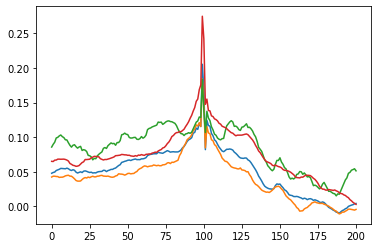

In [15]:
plt.plot(df_lfps[f"STA"][8:11].to_numpy().mean(axis=0))
plt.plot(df_lfps[f"STA"][8])
plt.plot(df_lfps[f"STA"][10])
plt.plot(df_lfps[f"STA"][11])

In [93]:
np.array(df_lfps[f"STA\n(z-scored)"][:3].values.tolist()).flatten()

array([0.10688412, 0.11297317, 0.1191557 , 0.12535932, 0.13205017,
       0.1417205 , 0.14636732, 0.15021791, 0.16518189, 0.21360136,
       0.09273753, 0.09939094, 0.10777704, 0.11538451, 0.12467296,
       0.13116863, 0.13867912, 0.14151898, 0.16025225, 0.23294472,
       0.98553425, 1.04721542, 1.11159588, 1.17407904, 1.2336968 ,
       1.28090021, 1.32273187, 1.35034341, 1.40721527, 1.5252579 ])

<AxesSubplot:xlabel='time before spike (ms)', ylabel='STA\n(z-scored)'>

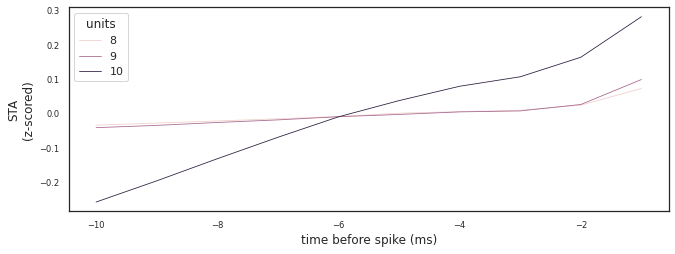

In [94]:
df_STA = pd.DataFrame({
    "STA\n(z-scored)" : (np.array([
    i - i.mean()
    for i in df_lfps[f"STA\n(z-scored)"][:3].values.tolist()
])).flatten(), 
    "units" : np.repeat(df_spikes.unit_id.to_numpy()[:3], interval), 
    "time before spike (ms)" : np.array((list(map(operator.neg, reversed(range(1,interval+1)))))*3) #len(df_spikes.unit_i)
})
sns.lineplot(data=df_STA, x="time before spike (ms)", y="STA\n(z-scored)", hue="units")



In [226]:
(np.array([
    i - i.mean()
    for i in df_lfps[f"STA\n(z-scored)"][:3].values.tolist()
])).flatten()

array([[-0.03446703, -0.02837798, -0.02219545, -0.01599183, -0.00930097,
         0.00036936,  0.00501618,  0.00886676,  0.02383075,  0.07225022],
       [-0.04171514, -0.03506173, -0.02667563, -0.01906815, -0.00977971,
        -0.00328404,  0.00422645,  0.00706631,  0.02579958,  0.09849205],
       [-0.25832276, -0.19664159, -0.13226113, -0.06977796, -0.0101602 ,
         0.0370432 ,  0.07887486,  0.1064864 ,  0.16335827,  0.2814009 ]])

<AxesSubplot:xlabel='time before spike (ms)', ylabel='STA\n(z-scored)'>

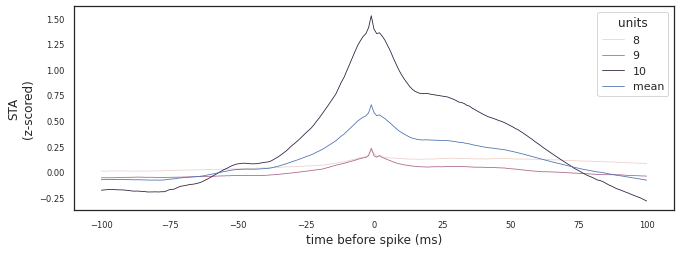

In [22]:
df_STA = pd.DataFrame({
    "STA\n(z-scored)" : np.array(df_lfps[f"STA"][:3].values.tolist()).flatten(), 
    "units" : np.repeat(df_spikes.unit_id.to_numpy()[:3], interval*2+1), 
    "time before spike (ms)" : np.array((list(map(operator.neg, reversed(range(1,interval+1)))) + list(range(interval+1)))*3) #len(df_spikes.unit_i)
})
sns.lineplot(data=df_STA, x="time before spike (ms)", y="STA\n(z-scored)", hue="units")

df_STA_mean = pd.DataFrame({
    "STA\n(z-scored)" : df_lfps[f"STA"][:3].to_numpy().mean(axis=0), 
    "units" : np.repeat(np.array("mean"), interval*2+1), 
    "time before spike (ms)" : np.array((list(map(operator.neg, reversed(range(1,interval+1)))) + list(range(interval+1)))) #len(df_spikes.unit_i)
})
sns.lineplot(data=df_STA_mean, x="time before spike (ms)", y="STA\n(z-scored)", hue="units")


In [306]:
import matplotlib
import matplotlib.lines as mlines
class PLOTTER(): 
    
    def __init__(self):
        
        ### define colors ##
        self.blue2    = "#2e518c"
        self.blue3    = "#5079b3"
        self.blue4    = "#7da7d9"
        self.green1   = "#146614"
        self.green2   = "#2e8c2e"
        self.green3   = "#50b350"
        self.green4   = "#7dd97d"
        self.green5   = "#b3ffb3"
        self.red1     = "#660000"
        self.red2     = "#8c1919"
        self.red3     = "#b33e3e"
        self.red4     = "#d97272"
        self.red5     = "#ffb3b3"
        self.magenta1 = "#581466"
        self.magenta2 = "#762e8c"
        self.magenta3 = "#9650b3"
        self.magenta4 = "#b87dd9"
        self.magenta5 = "#dfb3ff"
        self.orange1  = "#b34e0b"
        self.orange2  = "#c67322"
        self.orange3  = "#d99a3d"
        self.orange4  = "#ecc05c"
        self.orange5  = "#ffe480"
        self.cyan1    = "#146666"
        self.cyan2    = "#2e8c8c"
        self.cyan3    = "#50b3b3"
        self.cyan4    = "#7dd9d9"
        self.cyan5    = "#b3ffff"
        self.gray1    = "#4d4d4d"
        self.gray2    = "#6c6c6c"
        self.gray3    = "#8c8c8c"
        self.gray4    = "#acacac"
        self.gray5    = "#cccccc"
        
        palette = "viridis"
        sns.set_palette(palette)
        
        # Plot customizations
        self.tic_font_size = "x-small"
        self.label_font_size = "small"

        self.rc = {
            "figure.figsize":(10.75, 3.75),
            "font.family":"sans serif", 
            "text.usetex":False,
            "xtick.labelsize":self.tic_font_size,
            "ytick.labelsize":self.tic_font_size,
            "axes.axisbelow":True,
            "lines.linewidth":0.8, 
            "legend.fancybox":True, 
            # "text.usetex" : True, 
            # "pdf.fonttype" : 42
        }

        matplotlib.rcParams["lines.linewidth"] = 0.8
        matplotlib.rcParams["legend.fancybox"] = True
        # matplotlib.rcParams["pdf.fonttype"] = 42
        # matplotlib.rcParams["ps.fonttype"] = 42

        # matplotlib.rcParams["text.usetex"] = True

        sns.set(rc=self.rc)
        sns.set_style('white')

        plt.tight_layout()
        
        
        
    
    def plot_STA(
        self, 
        lfps, 
        spikes,
        interval        
    ):
        
        ## set up frame for data ##
        fig, axs = plt.subplots(5, 4, figsize=(11, 7), squeeze=False)
        
        x_label = "time around spike [$ms$]"
        y_label = "STA\n(z-scored)"
        
        #fig.suptitle("STAs for different channels with 100ms before and after", fontweight='bold', fontsize=30)
        #fig.supxlabel('STA interval', fontweight='light', fontsize=20)
        #fig.supylabel('mean voltage', fontweight='light', fontsize=20)
        #fig, axs = plt.subplots(4, 2, figsize=(20, 10))
        #for i in range(len(df_lfps[f"STA_int{intervall}"])): 
        for i in range(19): 
                
            k = i // 4
            j = i % 4
        
            ## fig prep ##
            axs[k,j].grid(linewidth=0.5, linestyle="dashed", zorder=0)
            axs[k,j].tick_params(
                    direction = "in", 
                    bottom = False, top = False,
                    left = True, right = False,
                    zorder = 1
            )
            
            axs[k,j].set_xlabel('', fontweight='light', fontsize=self.label_font_size)
            axs[k,j].set_ylabel('', fontweight='light', fontsize=self.label_font_size)

            c = list(set(lfps.csc_nr.tolist()))[i]

            c_idx = np.where(lfps.csc_nr == c)[0]
        
            df_STA = pd.DataFrame({
                y_label : np.array(lfps[y_label][c_idx].values.tolist()).flatten(), 
                "units" : np.repeat(spikes.unit_id.to_numpy()[c_idx], interval*2+1), 
                x_label : np.array(
                    (list(
                        map(
                            operator.neg, 
                            reversed(range(1,interval+1))
                        )
                    ) 
                     + list(range(interval+1)))

                    * c_idx.size) 
            })
            colors = sns.color_palette([self.red1, self.red2, self.red3, self.red4])
            #sns.set_palette(sns.color_palette(colors))
            sns.lineplot(ax=axs[k,j], data=df_STA, x=x_label, y=y_label, hue="units", 
                        palette="dark:salmon_r")

            if c_idx.size>1:
                df_STA_mean = pd.DataFrame({
                    y_label : df_lfps[y_label][c_idx].to_numpy().mean(axis=0), 
                    "units" : np.repeat(np.array("mean"), interval*2+1), 
                    x_label : np.array(
                        (list
                         (map(
                             operator.neg, 
                             reversed(range(1,interval+1))
                         )) 
                         + list(range(interval+1)))) #len(df_spikes.unit_i)
                })
                
                colors = [self.gray4]
                sns.set_palette(sns.color_palette(colors))
                sns.lineplot(ax=axs[k,j], data=df_STA_mean, x=x_label, y=y_label, hue="units")

            axs[k,j].set_title(f"channel {c}", fontsize=self.label_font_size)
            handles, labels = axs[k,j].get_legend_handles_labels()
            axs[k,j].legend(
                handles=handles, labels=labels, 
                title="units", title_fontsize=self.label_font_size,
                fontsize=self.tic_font_size, 
                loc="upper left", bbox_to_anchor=(1.02,1.09)
            ) 
            
            axs[k,j].set_ylabel(f"STA\n[z-std]", fontweight='light', fontsize=self.label_font_size)
            

        plt.subplots_adjust(hspace=0.9, wspace=1.15)
        
        return fig, axs
    
    
    def plot_best_theta_with_STA(
        self, 
        theta_df, 
        channels,
        best_values, 
        lfps, 
        spikes,
        interval   
    ):

        ## set up frame for data ##
        rows = 5
        cols = 4
        fig, axs = plt.subplots(rows, cols, figsize=(11,10))
        
        x_label = "time before spike [$ms$]"
        y_label = "weight values"
        y_label_STA = "STA\n[z-std]"
        


        csc_set = list(set(channels))
        n_csc = len(csc_set)

        for i in range(n_csc): 

            k = i // 4
            j = i % 4

            ## fig prep ##
            axs[k,j].grid(linewidth=0.5, linestyle="dashed", zorder=0)
            axs[k,j].tick_params(
                    direction = "in", 
                    bottom = False, top = False,
                    left = True, right = False,
                    zorder = 1
            )

            axs[k,j].set_xlabel('', fontweight='light', fontsize=self.label_font_size)
            axs[k,j].set_ylabel('', fontweight='light', fontsize=self.label_font_size)

            c = csc_set[i]
            c_idx = np.where(lfps.csc_nr == c)[0]
        
            x_c = theta_df.iloc[np.array(theta_df.channel==c)]
            xs_u = []
            for u in set(x_c.unit.tolist()):
                l, alpha = best_values[f"{u}"]
                x_u = x_c.iloc[np.array(x_c.unit==u)]
                x_u = x_u.iloc[np.array(x_u.alpha==alpha)]
                x_u = x_u.iloc[np.array(x_u.regularization==f"L{l+1}")]
                x_u[f"{y_label}"] = (x_u[f"{y_label}"].to_numpy() - x_u[f"{y_label}"].to_numpy().mean()) / x_u[f"{y_label}"].to_numpy().std()
                xs_u.append(x_u)
                #print(x_u)
                #xs_u.append((x_u-x_u.mean())/x_u.std())
            xs = pd.concat(xs_u)
            sns.lineplot(
                ax=axs[k,j], data=xs, 
                y=y_label, x=x_label, 
                hue="unit", palette="dark:salmon_r"
            )

            axs[k,j].set_ylabel(f"{y_label}\n[z-std]", fontweight='light', fontsize=self.label_font_size)
            axs[k,j].set_title(f"channel {c}", fontsize=self.label_font_size, pad=40)
            handles, labels = axs[k,j].get_legend_handles_labels()
            axs[k,j].legend(
                handles=handles, labels=labels, 
                title="units", title_fontsize=self.label_font_size,
                fontsize=self.tic_font_size, 
                loc="upper center", bbox_to_anchor=(0.5,1.65), 
                ncol=len(x_c.unit.tolist())
            ) 
            
            ## STA ##
            axj = axs[k,j].twinx()
            axj.set_ylabel('', fontweight='light', fontsize=self.label_font_size)
            
            df_STA = pd.DataFrame({
                #y_label_STA : np.array(lfps[y_label_STA][c_idx].values.tolist()).flatten(), 
                y_label_STA : (np.array([(i - i.mean())/i.std() for i in lfps[y_label_STA][c_idx].values.tolist()])).flatten(),
                "units" : np.repeat(spikes.unit_id.to_numpy()[c_idx], interval), 
                x_label : np.array(
                    (list(
                        map(
                            operator.neg, 
                            reversed(range(1,interval+1))
                        )
                    ))
                    *c_idx.size) 
            })
            #colors = sns.color_palette([self.red1, self.red2, self.red3, self.red4])
            #sns.set_palette(sns.color_palette(colors))
            sns.lineplot(ax=axj, data=df_STA, x=x_label, y=y_label_STA, hue="units", 
                        palette="dark:salmon_r", legend=False)
            for line in axj.lines:
                line.set_linestyle("--")
                
            ## same limits ##
            kj_lim = axs[k,j].get_ylim()
            j_lim = axj.get_ylim()
            
            y_min = np.min([kj_lim, j_lim])
            y_max = np.max([kj_lim, j_lim])
            
            axs[k,j].set_ylim(y_min+y_min/10, y_max+y_max/10)
            axj.set_ylim(y_min+y_min/10, y_max+y_max/10)

                
        ## legend for STA vs theta ##
        handlers = []
        
        handlers.append(
            mlines.Line2D([], [], color=self.gray4, linestyle='-',
                      markersize=10, label="inferred weights\naveraged over splits\n(z-scored per unit)")
        )
        
        handlers.append(
            mlines.Line2D([], [], color=self.gray4, linestyle='--',
                      markersize=10, label="STA\n(z-scored per unit)")
        )
        
        plt.legend(handles=handlers, ncol=1, 
                   fontsize=self.label_font_size, 
                   loc="upper center", bbox_to_anchor=(2.5,1.25),
                   title="STA vs. weights", title_fontsize="medium")

            
        plt.subplots_adjust(hspace=1.5, wspace=0.98)
        
        return fig, axs
 
    


In [303]:
a = np.array([3,4])
b = np.array([2,1])
print(int(np.min([a,b])))

1


/tmp/ipykernel_55365/614880771.py:217: RuntimeWarning: invalid value encountered in true_divide
  x_u[f"{y_label}"] = (x_u[f"{y_label}"].to_numpy() - x_u[f"{y_label}"].to_numpy().mean()) / x_u[f"{y_label}"].to_numpy().std()


<Figure size 774x270 with 0 Axes>

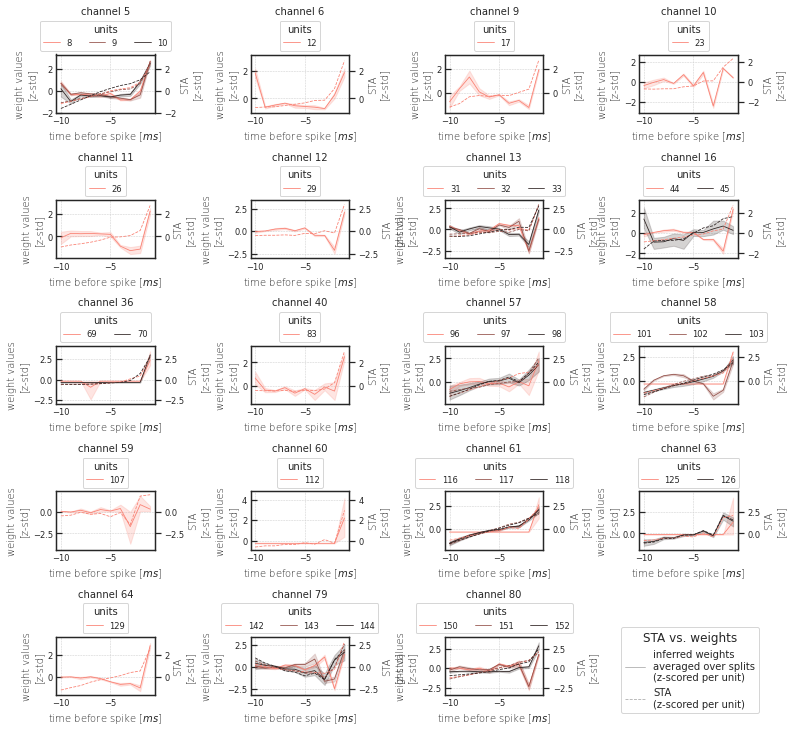

In [304]:
pltr = PLOTTER()
figSTA, axs = pltr.plot_best_theta_with_STA(
    theta_df, channels, als,
    df_lfps, 
    df_spikes, 
    interval
)
figSTA.delaxes(ax=axs[4,3])
plt.subplots_adjust(
    left=0.07, right=0.93, bottom=0.04, top=0.93, 
)
figSTA.savefig('plots/theta_STA_zs.png')
figSTA.savefig('plots/theta_STA_zs.pdf')

In [308]:
print(interval)

100


<Figure size 774x270 with 0 Axes>

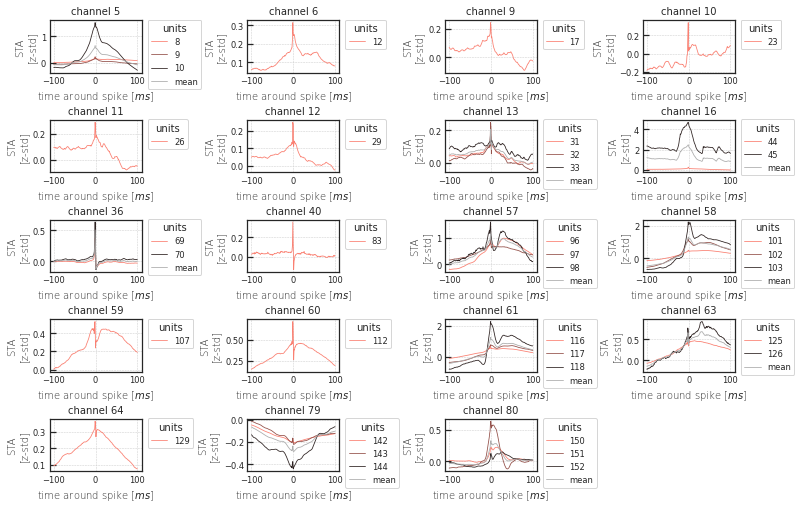

In [316]:
pltr = PLOTTER()
figSTA, axs = pltr.plot_STA(
    df_lfps, 
    df_spikes, 
    interval
)
figSTA.delaxes(ax=axs[4,3])
plt.subplots_adjust(
    left=0.06, right=0.925, bottom=0.065, top=0.96, 
)
figSTA.savefig('plots/STA.png')
figSTA.savefig('plots/STA.pdf')

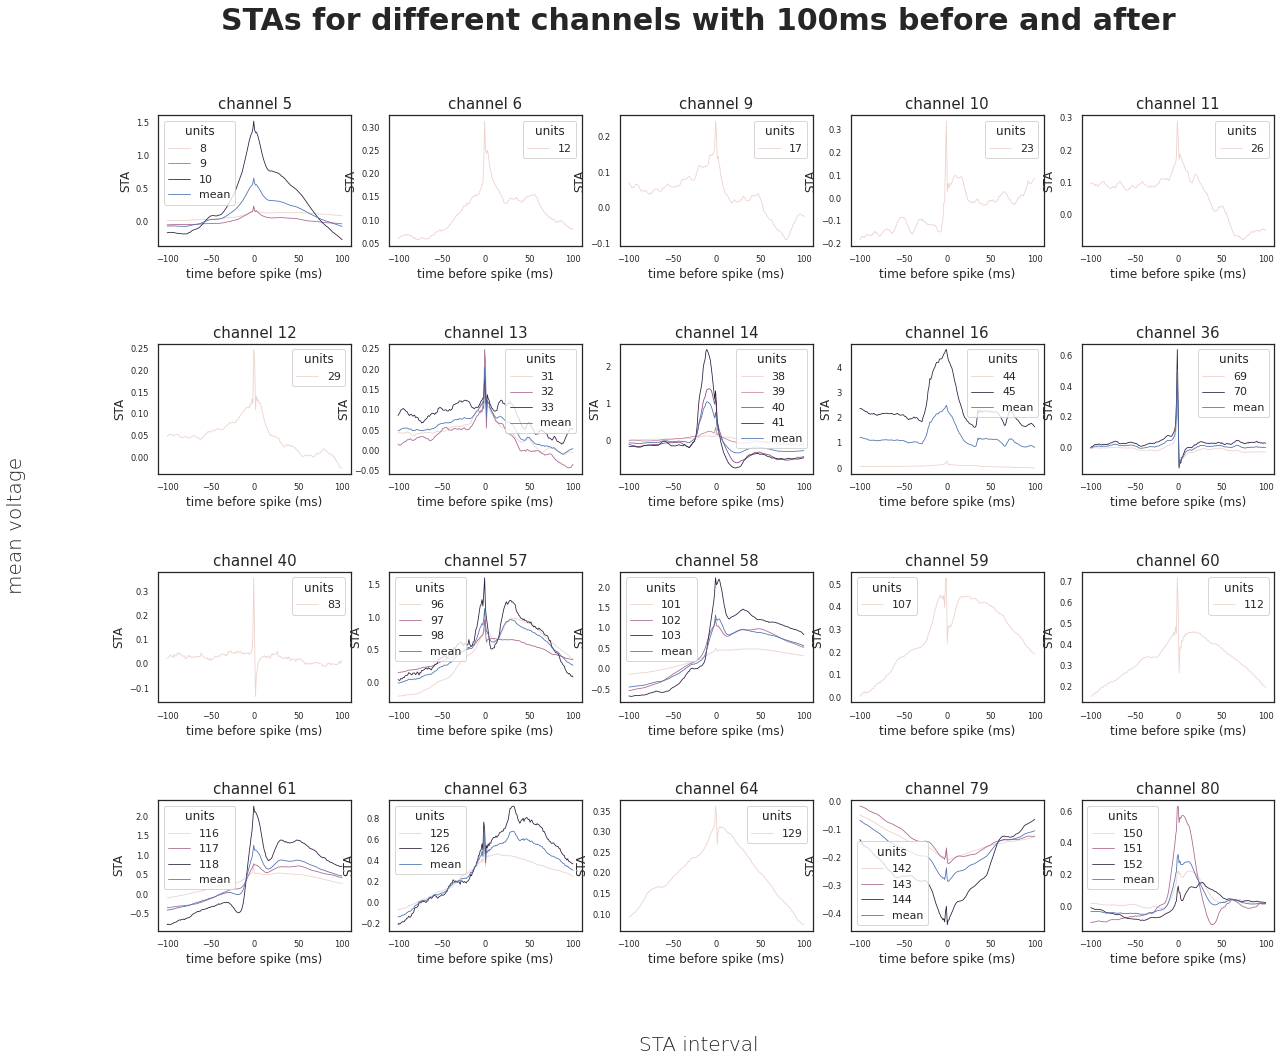

In [153]:
fig, axs = plt.subplots(4, 5, figsize=(20, 15))
fig.suptitle("STAs for different channels with 100ms before and after", fontweight='bold', fontsize=30)
fig.supxlabel('STA interval', fontweight='light', fontsize=20)
fig.supylabel('mean voltage', fontweight='light', fontsize=20)
#fig, axs = plt.subplots(4, 2, figsize=(20, 10))
#for i in range(len(df_lfps[f"STA_int{intervall}"])): 
for i in range(20): 
    k = i // 5
    j = i % 5
    
    c = list(set(df_lfps.csc_nr.tolist()))[i]
    
    c_idx = np.where(df_lfps.csc_nr == c)[0]
    
    df_STA = pd.DataFrame({
        "STA" : np.array(df_lfps[f"STA"][c_idx].values.tolist()).flatten(), 
        "units" : np.repeat(df_spikes.unit_id.to_numpy()[c_idx], interval*2+1), 
        "time before spike (ms)" : np.array(
            (list(
                map(
                    operator.neg, 
                    reversed(range(1,interval+1))
                )
            ) 
             + list(range(interval+1)))
            
            * c_idx.size) 
    })
    sns.lineplot(ax=axs[k,j], data=df_STA, x="time before spike (ms)", y="STA", hue="units")
    
    if c_idx.size>1:
        df_STA_mean = pd.DataFrame({
            "STA" : df_lfps[f"STA"][c_idx].to_numpy().mean(axis=0), 
            "units" : np.repeat(np.array("mean"), interval*2+1), 
            "time before spike (ms)" : np.array(
                (list
                 (map(
                     operator.neg, 
                     reversed(range(1,interval+1))
                 )) 
                 + list(range(interval+1)))) #len(df_spikes.unit_i)
        })
        sns.lineplot(ax=axs[k,j], data=df_STA_mean, x="time before spike (ms)", y="STA", hue="units")
    
    axs[k,j].set_title(f"channel {c}", fontsize=15)
    
plt.subplots_adjust(hspace=0.75)

plt.show()


<AxesSubplot:xlabel='time before spike (ms)', ylabel='STA'>

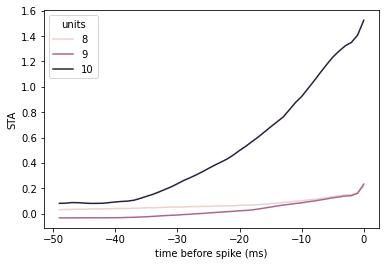

In [72]:
sns.lineplot(data=df_STA, x="time before spike (ms)", y="STA", hue="units")

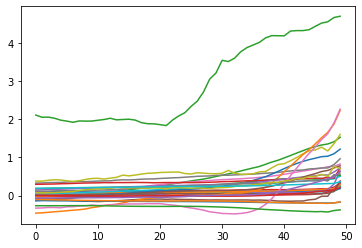

In [29]:
import matplotlib.pyplot as plt
for i in range(35):
    plt.plot(df_lfps[f"STA_spike_int{interval}_{source_sta}"][i].transpose().mean(axis=1))
plt.show()